In [11]:
!pip install pyspark

     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.3/317.3 MB ? eta -:--:--
     ---------------------------------------- 1.0/317.3 MB 2.4 MB/s eta 0:02:12
     ---------------------------------------- 2.4/317.3 MB 3.9 MB/s eta 0:01:20
     ---------------------------------------- 3.9/317.3 MB 5.0 MB/s eta 0:01:03
      --------------------------------------- 6.0/317.3 MB 6.1 MB/s eta 0:00:51
     - -------------------------------------- 8.1/317.3 MB 6.8 MB/s eta 0:00:46
     - ------------------------------------- 11.8/317.3 MB 8.5 MB/s eta 0:00:37
     - ------------------------------------- 15.7/317.3 MB 9.8 MB/s eta 0:00:31
     -- ----------------------------------- 19.9/317.3 MB 10.9 MB/s eta 0:00:28
     -- ----------------------------------- 24.4/317.3 MB 12.1 MB/s eta 0:00:25
     --- ---------------------------------- 29.4/317.3 MB 13.

In [12]:
from pyspark.sql import SparkSession

In [16]:
spark = SparkSession.builder \
      .master("spark://172.20.10.4:7077") \
      .appName("Heart Disease Analysis") \
      .getOrCreate()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

C:\Users\yashb\AppData\Local\Temp\ipykernel_26920\3934231510.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


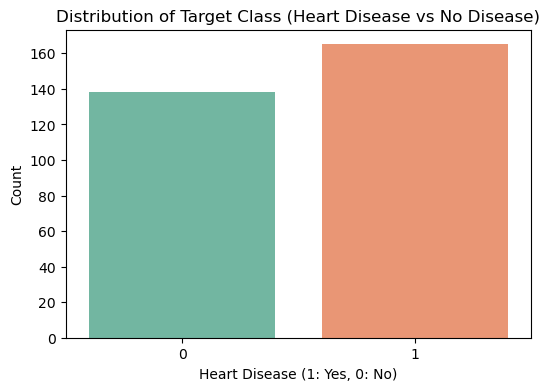

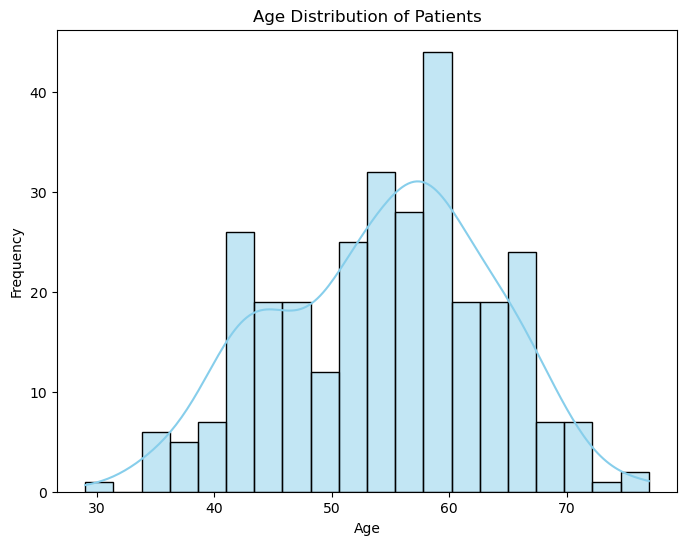

C:\Users\yashb\AppData\Local\Temp\ipykernel_26920\3934231510.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='viridis')


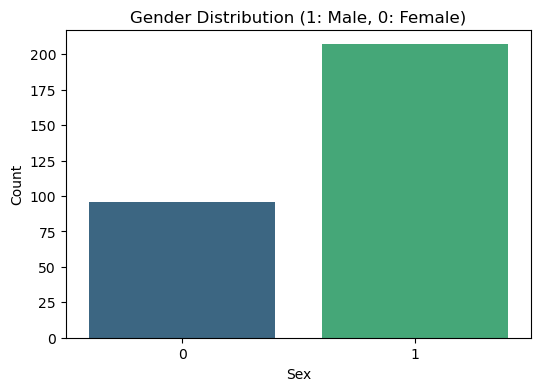

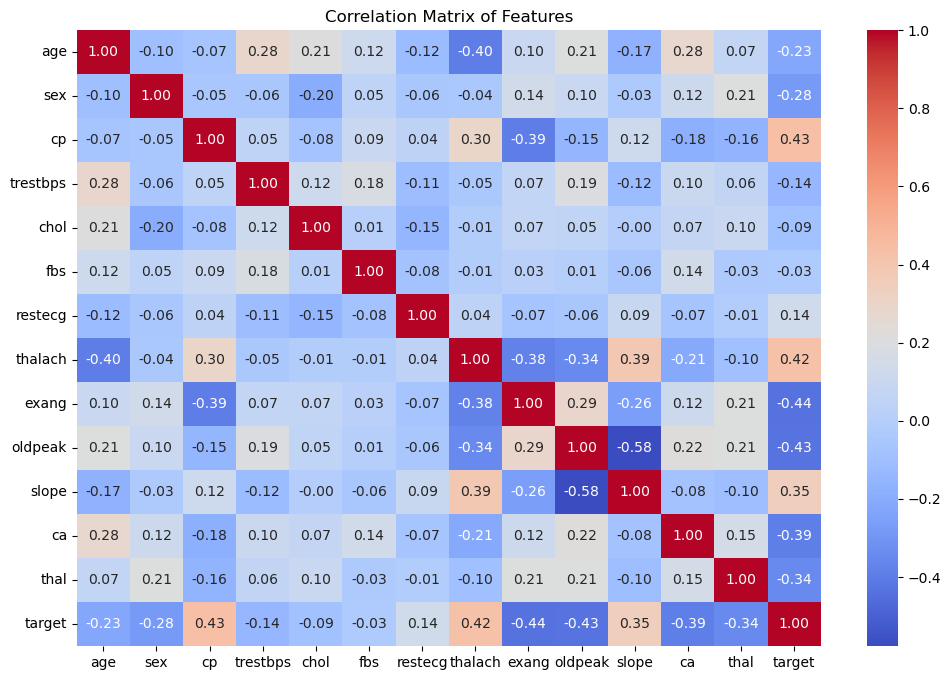

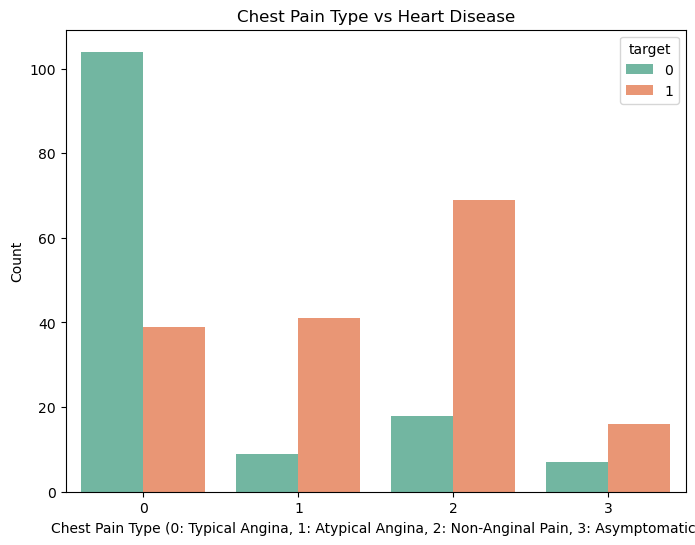

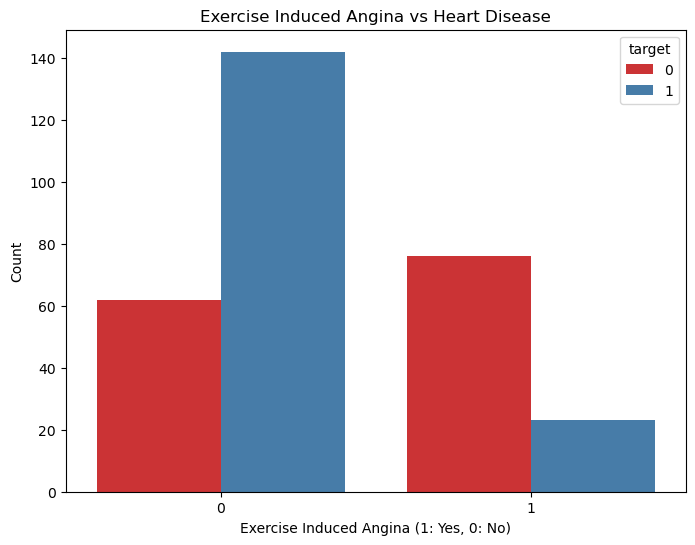

C:\Users\yashb\AppData\Local\Temp\ipykernel_26920\3934231510.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='oldpeak', palette='Set1')


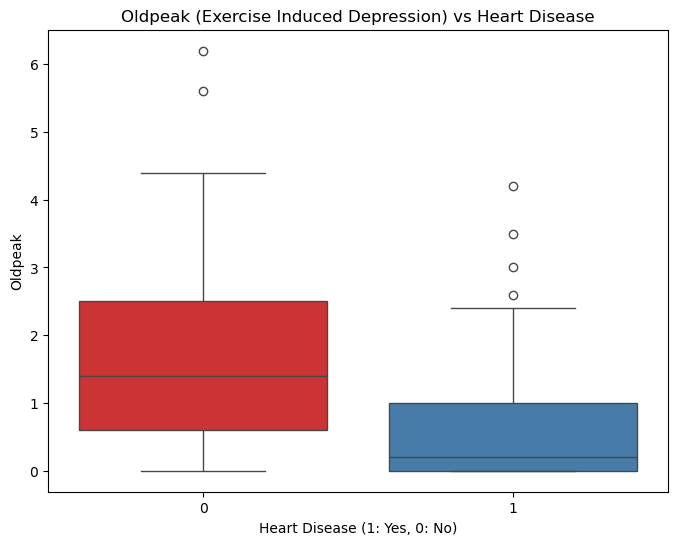

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# To display all columns for better analysis
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Display first few rows of the dataset to understand the structure
print(df.head())

# 1. Analyzing the Size (Dataset Size - Number of Rows and Columns)
# Get basic information about the dataset
df_info = df.info()

# Check the number of rows and columns
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# 2. Analyzing the Structure (Data Types and Missing Values)
# Check for missing values
missing_values = df.isnull().sum()

# Check the data types of each column
data_types = df.dtypes

# Print missing values and data types
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)

# 3. Analyzing the Speed (Performance Analysis - Basic Statistics)
# Get basic statistics (mean, median, std, etc.)
statistics = df.describe()

print("Basic Statistics:\n", statistics)

# 4. Analyzing the Scope (Visualizing the Data)
# 4.1 Distribution of Target Class
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title("Distribution of Target Class (Heart Disease vs No Disease)")
plt.xlabel("Heart Disease (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

# 4.2 Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 4.3 Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', palette='viridis')
plt.title("Gender Distribution (1: Male, 0: Female)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# 4.4 Correlation Between Features
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

# 4.5 Impact of Chest Pain Type on Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', hue='target', palette='Set2')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic)")
plt.ylabel("Count")
plt.show()

# 4.6 Impact of Exercise Induced Angina on Heart Disease
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='exang', hue='target', palette='Set1')
plt.title("Exercise Induced Angina vs Heart Disease")
plt.xlabel("Exercise Induced Angina (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

# 4.7 Oldpeak vs Target (Depression Induced by Exercise)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='oldpeak', palette='Set1')
plt.title("Oldpeak (Exercise Induced Depression) vs Heart Disease")
plt.xlabel("Heart Disease (1: Yes, 0: No)")
plt.ylabel("Oldpeak")
plt.show()


